In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [3]:
def get_mean_and_std(dataset):
    '''Compute the mean and std value of dataset.'''
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, num_workers=2)

    mean = torch.zeros(3)
    std = torch.zeros(3)
    print('==> Computing mean and std..')
    for inputs, targets in dataloader:
        for i in range(3):
            mean[i] += inputs[:, i, :, :].mean()
            std[i] += inputs[:, i, :, :].std()
    mean.div_(len(dataset))
    std.div_(len(dataset))
    return mean, std

In [4]:
#To determine if your system supports CUDA
print("==> Check devices..")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Current device: ",device)

#Also can print your current GPU id, and the number of GPUs you can use.
print("Our selected device: ", torch.cuda.current_device())
print(torch.cuda.device_count(), " GPUs is available")
#device = 'cpu'

==> Check devices..
Current device:  cuda
Our selected device:  0
1  GPUs is available


In [5]:
print('==> Preparing dataset..')

==> Preparing dataset..


In [6]:
"""1.1"""
#img_size, linear_size, fc1_out, fc2_out = 64, 13, 128, 84
#img_size, linear_size, fc1_out, fc2_out = 64, 13, 128, 84
#img_size, linear_size, fc1_out, fc2_out = 128, 29, 256, 84
#img_size, linear_size, fc1_out, fc2_out = 256, 61, 256, 84
img_size, linear_size, fc1_out, fc2_out = 224, 53, 120, 84
#img_size, linear_size, fc1_out, fc2_out = 512, 125, 256, 84
#img_size, linear_size, fc1_out, fc2_out = 512, 125, 512, 84
#img_size, linear_size, fc1_out, fc2_out = 1024, 253, 256, 84

calculate_mean_std = False
        
if calculate_mean_std == True:
    #The transform function for train data
    transform_train = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])

    transform_val = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])

    #The transform function for test data
    transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])

    #we will calculate mean and std
    
    trainset = torchvision.datasets.ImageFolder(root='../data/food/train', transform=transform_train)
    valset = torchvision.datasets.ImageFolder(root='../data/food/val', transform=transform_val)
    testset = torchvision.datasets.ImageFolder(root='../data/food/test', transform=transform_test)
    
    train_mean, train_std = get_mean_and_std(trainset)
    print(train_mean, train_std)
    val_mean, val_std = get_mean_and_std(valset)
    print(val_mean, val_std)
    test_mean, test_std = get_mean_and_std(testset)
    print(test_mean, test_std)
else:
    train_mean, train_std = ([0.5693, 0.4504, 0.3258]), ([0.2165, 0.2278, 0.2246])
    val_mean, val_std = ([0.5733, 0.4533, 0.3317]), ([0.2151, 0.2269, 0.2230])
    test_mean, test_std = ([0.5745, 0.4543, 0.3319]), ([0.2157, 0.2275, 0.2246])

In [7]:
"""1.1+"""
#The transform function for train data
transform_train = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(train_mean, train_std)
])

#The transform function for validation data
transform_val = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(val_mean, val_std)
])

#The transform function for test data
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(test_mean, test_std)
])

In [8]:
"""1.2+"""
trainset = torchvision.datasets.ImageFolder(root='../data/food/train', transform=transform_train)
valset = torchvision.datasets.ImageFolder(root='../data/food/val', transform=transform_val)
testset = torchvision.datasets.ImageFolder(root='../data/food/test', transform=transform_test)

In [9]:
"""1.3"""

#Create DataLoader to draw samples from the dataset
#In this case, we define a DataLoader to random sample our dataset. 
#For single sampling, we take one batch of data. Each batch consists 4 images
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=32,
shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
shuffle=False, num_workers=2)

In [10]:
classes = ('Bread', 'DairyProduct', 'Dessert', 'Egg', 'Friedfood',
           'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable')

In [11]:
print('==> Building model..')

==> Building model..


In [12]:
import torch.nn as nn

In [13]:
img_size, linear_size, fc1_out, fc2_out = 224, 44, 120, 84

# define your own model
class Net(nn.Module):

    #define the layers
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 16, 5)
        self.conv4 = nn.Conv2d(16, 16, 5)
        self.conv5 = nn.Conv2d(16, 16, 5)
        self.fc1 = nn.Linear(16 * linear_size * linear_size, fc1_out)
        self.fc2 = nn.Linear(fc1_out, fc2_out)
        self.fc3 = nn.Linear(fc2_out, 11)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        
    #concatenate these layers
    def forward(self, x):
        x = self.pool1(self.relu(self.conv1(x))) # 224 -> 220; 3 -> 6; 220 -> 219; 
        x = self.pool2(self.relu(self.conv2(x))) # 219 -> 215; 6 -> 16; 215 -> 107; 
        x = self.pool1(self.relu(self.conv3(x))) # 107 -> 103; 16 -> 16; 107 -> 102; 
        x = self.pool2(self.relu(self.conv4(x))) # 102 -> 98; 16 -> 16; 98 -> 49; 
        x = self.pool1(self.relu(self.conv5(x))) # 49 -> 45; 16 -> 16; 45 -> 44; 
        x = x.view(-1, 16 * linear_size * linear_size)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
#declare a new model
net = Net()
# change all model tensor into cuda type
# something like weight & bias are the tensor 
#net = net.to(device)
print(device)
if device == 'cuda':
    net = net.cuda(0)
else:
    net = net.cpu()

print(net)

cuda
Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=30976, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=11, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5)
)


########################################################################

# 3. Define a Loss function and optimize

########################################################################

In [15]:
print('==> Defining loss function and optimize..')

==> Defining loss function and optimize..


In [16]:
import torch.optim as optim

#loss function
criterion = nn.CrossEntropyLoss()
#optimization algorithm
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

########################################################################

# 4. Train the network

Before training the model, we need to analysis the tensor variable.


Each variable have many attibute, like: .grad_fn, .require_grad, .data, .grad...etc. The ".grad_fn" attribute of "torch.Tensor" is an entry point into the function that has create this "torch.Tensor" variables. Because of ".grad_fn" flag, we can easily create a computing graph in the form of DAG(directed acyclic graph).

And then, the ".require_grad" attribute allows us to determine whether the backward propagation function is going to calculate the gradient of this "torch.Tensor" variable. If one variable has a false value of require_grad, it represent that you don't want to calculate this variable's gradient, and also its gradient will not be updated.

########################################################################

In [17]:
print('==> Training model..')

==> Training model..


In [18]:
for phase in ['train', 'val']:
    if phase == 'train':
        print(phase)    
    else:
        print(phase)

train
val


In [19]:
import copy

best_model = net
best_acc = 0.0

In [28]:
#Set the model in training mode
#because some function like: dropout, batchnorm...etc, will have 
#different behaviors in training/evaluation mode
#[document]: https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train

net.train()
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3, verbose=True)
#lr_scheduler = torch.optim.lr_scheduler.StepLR
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 1, gamma=0.5)

for epoch in range(130):  # loop over the dataset multiple times
    #scheduler.step()
    
    for phase in ['train', 'val']:
        if phase == 'train':
            net.train(True)  # Set model to training mode
            dset_loaders = trainloader
        else:
            net.train(False)  # Set model to evaluate mode
            dset_loaders = valloader
            
        running_loss = 0.0
        correct = 0
        
        for data in dset_loaders:
        
            (inputs, labels) = data
            
            #change the type into cuda tensor 
            if device == 'cuda':
                inputs = inputs.cuda(0)
                labels = labels.cuda(0)
            else:
                inputs = inputs.cpu()
                labels = labels.cpu()

            #print(labels)
            #print(inputs)
        
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            # select the class with highest probability
            _, pred = outputs.max(1)
            # if the model predicts the same results as the true
            # label, then the correct counter will plus 1
            correct += pred.eq(labels).sum().item()
        
            loss = criterion(outputs, labels)
        
            if phase == 'train':
                loss.backward()
                optimizer.step()

            # print statistics
            running_loss += loss.item()

        if phase == 'train':
            epoch_loss = running_loss / len(trainset)
            epoch_acc = correct / len(trainset)
        else:
            epoch_loss = running_loss / len(valset)
            epoch_acc = correct / len(valset)

        print('{:d} Epoch {} Loss: {:.4f} Acc: {:.4f}'.format(epoch, phase, epoch_loss, epoch_acc))

        # deep copy the model
        if phase == 'val' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model = copy.deepcopy(net)
    
        if phase == 'val':
            lr_scheduler.step(epoch_loss)

print('Finished Training')

net = best_model

0 Epoch train Loss: 0.0403 Acc: 0.5673
0 Epoch val Loss: 0.0350 Acc: 0.6257
1 Epoch train Loss: 0.0400 Acc: 0.5658
1 Epoch val Loss: 0.0350 Acc: 0.6257
2 Epoch train Loss: 0.0404 Acc: 0.5674
2 Epoch val Loss: 0.0351 Acc: 0.6257
3 Epoch train Loss: 0.0399 Acc: 0.5685
3 Epoch val Loss: 0.0349 Acc: 0.6257
4 Epoch train Loss: 0.0403 Acc: 0.5674
4 Epoch val Loss: 0.0351 Acc: 0.6257
5 Epoch train Loss: 0.0398 Acc: 0.5712
5 Epoch val Loss: 0.0350 Acc: 0.6257
6 Epoch train Loss: 0.0402 Acc: 0.5702
6 Epoch val Loss: 0.0350 Acc: 0.6257
7 Epoch train Loss: 0.0397 Acc: 0.5700
7 Epoch val Loss: 0.0350 Acc: 0.6257
8 Epoch train Loss: 0.0399 Acc: 0.5682
8 Epoch val Loss: 0.0350 Acc: 0.6257
9 Epoch train Loss: 0.0403 Acc: 0.5699
9 Epoch val Loss: 0.0350 Acc: 0.6257
10 Epoch train Loss: 0.0398 Acc: 0.5736
10 Epoch val Loss: 0.0351 Acc: 0.6257
11 Epoch train Loss: 0.0398 Acc: 0.5695
11 Epoch val Loss: 0.0348 Acc: 0.6257
12 Epoch train Loss: 0.0401 Acc: 0.5636
12 Epoch val Loss: 0.0350 Acc: 0.6257
13 Epo

105 Epoch val Loss: 0.0352 Acc: 0.6257
106 Epoch train Loss: 0.0400 Acc: 0.5717
106 Epoch val Loss: 0.0350 Acc: 0.6257
107 Epoch train Loss: 0.0402 Acc: 0.5647
107 Epoch val Loss: 0.0351 Acc: 0.6257
108 Epoch train Loss: 0.0400 Acc: 0.5673
108 Epoch val Loss: 0.0350 Acc: 0.6257
109 Epoch train Loss: 0.0402 Acc: 0.5681
109 Epoch val Loss: 0.0350 Acc: 0.6257
110 Epoch train Loss: 0.0399 Acc: 0.5741
110 Epoch val Loss: 0.0350 Acc: 0.6257
111 Epoch train Loss: 0.0402 Acc: 0.5689
111 Epoch val Loss: 0.0349 Acc: 0.6257
112 Epoch train Loss: 0.0403 Acc: 0.5681
112 Epoch val Loss: 0.0349 Acc: 0.6257
113 Epoch train Loss: 0.0402 Acc: 0.5657
113 Epoch val Loss: 0.0351 Acc: 0.6257
114 Epoch train Loss: 0.0399 Acc: 0.5710
114 Epoch val Loss: 0.0348 Acc: 0.6257
115 Epoch train Loss: 0.0400 Acc: 0.5674
115 Epoch val Loss: 0.0350 Acc: 0.6257
116 Epoch train Loss: 0.0401 Acc: 0.5670
116 Epoch val Loss: 0.0350 Acc: 0.6257
117 Epoch train Loss: 0.0397 Acc: 0.5750
117 Epoch val Loss: 0.0349 Acc: 0.6257
1

/root/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


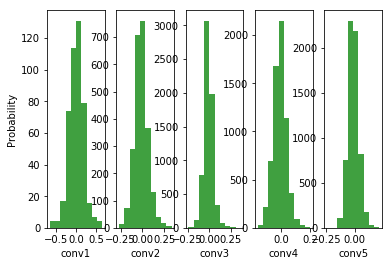

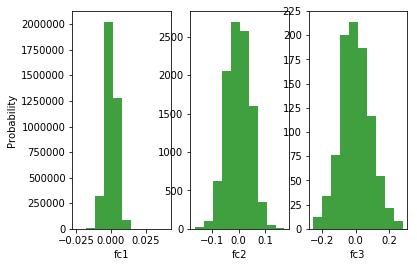

In [30]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def show_conv_weight_distribution():
    conv_num = 5
    for i in range(1, conv_num + 1):
        ax = plt.subplot(1, conv_num, i)
        #ax.set_ylim([0, 20000])
        plt.grid(False)

    plt.subplot(1, conv_num, 1)
    x = net.conv1.weight.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('conv1')
    plt.ylabel('Probability')

    ax = plt.subplot(1, conv_num, 2)
    x = net.conv2.weight.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('conv2')

    ax = plt.subplot(1, conv_num, 3)
    x = net.conv3.weight.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('conv3')

    ax = plt.subplot(1, conv_num, 4)
    x = net.conv4.weight.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('conv4')

    ax = plt.subplot(1, conv_num, 5)
    x = net.conv5.weight.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('conv5')

    plt.show()

def show_fc_weight_distribution():
    fc_num = 3
    for i in range(1, fc_num + 1):
        ax = plt.subplot(1, fc_num, i)
        #ax.set_ylim([0, 20000])
        plt.grid(False)

    ax = plt.subplot(1, fc_num, 1)
    x = net.fc1.weight.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('fc1')
    plt.ylabel('Probability')

    ax = plt.subplot(1, fc_num, 2)
    x = net.fc2.weight.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('fc2')

    ax = plt.subplot(1, fc_num, 3)
    x = net.fc3.weight.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('fc3')

    plt.show()

show_conv_weight_distribution()
show_fc_weight_distribution()

/root/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


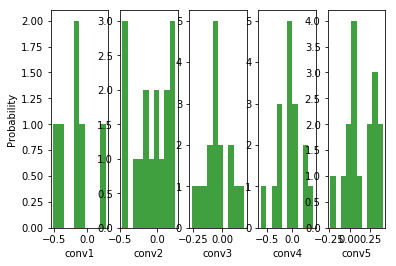

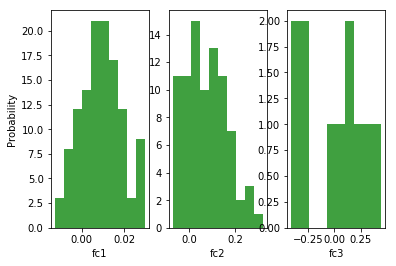

In [31]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def show_conv_bias_distribution():
    conv_num = 5
    for i in range(1, conv_num + 1):
        ax = plt.subplot(1, conv_num, i)
        #ax.set_ylim([0, 20000])
        plt.grid(False)

    plt.subplot(1, conv_num, 1)
    x = net.conv1.bias.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('conv1')
    plt.ylabel('Probability')

    ax = plt.subplot(1, conv_num, 2)
    x = net.conv2.bias.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('conv2')

    ax = plt.subplot(1, conv_num, 3)
    x = net.conv3.bias.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('conv3')

    ax = plt.subplot(1, conv_num, 4)
    x = net.conv4.bias.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('conv4')

    ax = plt.subplot(1, conv_num, 5)
    x = net.conv5.bias.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('conv5')

    plt.show()

def show_fc_bias_distribution():
    fc_num = 3
    for i in range(1, fc_num + 1):
        ax = plt.subplot(1, fc_num, i)
        #ax.set_ylim([0, 20000])
        plt.grid(False)

    ax = plt.subplot(1, fc_num, 1)
    x = net.fc1.bias.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('fc1')
    plt.ylabel('Probability')

    ax = plt.subplot(1, fc_num, 2)
    x = net.fc2.bias.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('fc2')

    ax = plt.subplot(1, fc_num, 3)
    x = net.fc3.bias.view(-1,1).cpu().detach().numpy()
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.75)
    plt.xlabel('fc3')

    plt.show()

show_conv_bias_distribution()
show_fc_bias_distribution()

In [32]:
#After training , save the model first
#You can saves only the model parameters or entire model
#Some difference between the two is that entire model 
#not only include parameters but also record hwo each 
#layer is connected(forward method).
#[document]: https://pytorch.org/docs/master/notes/serialization.html

print('==> Saving model..')

#only save model parameters
torch.save(net.state_dict(), './lab1-2_checkpoint.t7')
#you also can store some log information
state = {
    'net': net.state_dict(),
    'acc': 100.*correct/len(trainset),
    'epoch': 75
}
torch.save(state, './lab1-2_checkpoint.t7')

#save entire model
torch.save(net, './lab1-2_model.pt')

print('Finished Saving')

==> Saving model..
Finished Saving


/root/anaconda3/lib/python3.7/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


########################################################################

# 5. Test the network on the test data

########################################################################

In [33]:
#Before testing, we can load the saved model
#Depend on how you save your model, need 
#different way to use it

print('==> Loading model..')

#If you just save the model parameters, you
#need to redefine the model architecture, and
#load the parameters into your model
net = Net()
checkpoint = torch.load('./lab1-2_checkpoint.t7')
net.load_state_dict(checkpoint['net'])

#If you save the entire model
net = torch.load('./lab1-2_model.pt')

print('Finished Loading')

==> Loading model..
Finished Loading


In [34]:
print('==> Testing model..')

#Set the model in evaluation mode
#[document]: https://pytorch.org/docs/stable/nn.html#torch.nn.Module.eval 
net.eval()


==> Testing model..


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=30976, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=11, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5)
)

In [35]:
######################
#######LAB 1-1########
"""
To Do Here

        You should complete the testing step in LAB 1-1
You should show the total accuracy & loss [10000 cifar10 test cases]
  You also need to tell us, how about the accuracy for each class
 
    For example: Total accuracy is: 60.0% and loss is: 0.02  
                 For each class in cifar 10:
                 Accuracy of plane : 58.0%
                 Accuracy of   car : 22.4%
                            .
                            .
                            .
"""
######################
correct = 0
total = 0
running_loss = 0.0

class_correct = list(0. for i in range(11))
class_total = list(0. for i in range(11))

with torch.no_grad():
    for data in testloader:
        images, labels = data

        if device == 'cuda':
            images = images.cuda(0)
            labels = labels.cuda(0)
        else:
            images = images.cpu()
            labels = labels.cpu()
        
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        running_loss += loss.item()

        c = (predicted == labels).squeeze()
        #print(predicted)
        #print(labels.size(0))
        #print(c)
        for i in range(labels.size(0)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print('Accuracy of the network on the %d test images: %.2f%%, and loss is: %.3f'
      % (total, 100 * correct / total, running_loss / total))

for i in range(11):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 3347 test images: 64.65%, and loss is: 0.033
Accuracy of Bread : 43 %
Accuracy of DairyProduct : 31 %
Accuracy of Dessert : 91 %
Accuracy of   Egg : 50 %
Accuracy of Friedfood : 51 %
Accuracy of  Meat : 68 %
Accuracy of Noodles-Pasta : 74 %
Accuracy of  Rice : 70 %
Accuracy of Seafood : 67 %
Accuracy of  Soup : 71 %
Accuracy of Vegetable : 83 %


In [64]:
import os
import sys
import re
from collections import OrderedDict

def train_acc_loss_result(fname):

    dictionary_acc = OrderedDict()
    dictionary_loss = OrderedDict()
    
    with open(fname) as fp:  
        for cnt, line in enumerate(fp):
            # print("Line {}: {}".format(cnt, line))
            # 129 Epoch train Loss: 0.0349 Acc: 0.6257
            pattern = re.compile(r"(\d+) Epoch train Loss: (\d+.\d+) Acc: (\d+.\d+)")
            match = pattern.match(line)
            if match:
                epoch_str, loss_str, acc_str = match.groups()
                print('Epoch: {:s}, loss: {:s}, acc: {:s}'.
                      format(epoch_str, loss_str, acc_str))

                Epoch = int(epoch_str)
                loss = float("{:f}".format(float(loss_str)))
                acc = float("{:f}".format(float(acc_str)))

                dictionary_loss[Epoch] = loss
                dictionary_acc[Epoch] = acc
                    
    return dictionary_loss, dictionary_acc

In [73]:
import matplotlib.pyplot as plt
import itertools

def show_train_acc(dictionary_loss, dictionary_acc):
    fig, ax1 = plt.subplots()

    fig.set_figheight(20)
    fig.set_figwidth(20)

    ax1.set_title('Training Accuracy & Loss', fontsize=20)

    ax2 = ax1.twinx()
    ax2.figure.figsize=(120,120)
    
    l1, = ax1.plot(list(dictionary_acc.keys()), list(dictionary_acc.values()), 'b-')
    l2, = ax2.plot(list(dictionary_loss.keys()), list(dictionary_loss.values()), 'r--')
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    ax1.tick_params(axis='both', which='major', labelsize=20)
    ax2.tick_params(axis='y', which='major', labelsize=20)

    ax1.set_xlabel('Epoch', fontsize=20)
    ax1.set_ylabel('Accuracy', fontsize=20, color='b')
    ax2.set_ylabel('Loss', fontsize=20, color='r')

    ax1.set(ylim=[0, 1])
    #ax2.set(ylim=[0, 0.2])

    ax1.grid(axis='both', which='both')
    plt.legend(handles=[l1, l2],
               labels=['Accuracy', 'Loss'], fontsize=20, loc='right')

    plt.show()

In [74]:
fname = './lab1-2-1.log'
dictionary_loss, dictionary_acc = train_acc_loss_result(fname)

Epoch: 0, loss: 0.0735, acc: 0.1511
Epoch: 1, loss: 0.0710, acc: 0.1692
Epoch: 2, loss: 0.0700, acc: 0.2055
Epoch: 3, loss: 0.0694, acc: 0.2093
Epoch: 4, loss: 0.0687, acc: 0.2173
Epoch: 5, loss: 0.0678, acc: 0.2261
Epoch: 6, loss: 0.0668, acc: 0.2390
Epoch: 7, loss: 0.0656, acc: 0.2585
Epoch: 8, loss: 0.0650, acc: 0.2596
Epoch: 9, loss: 0.0647, acc: 0.2686
Epoch: 10, loss: 0.0637, acc: 0.2816
Epoch: 11, loss: 0.0633, acc: 0.2902
Epoch: 12, loss: 0.0628, acc: 0.2924
Epoch: 13, loss: 0.0625, acc: 0.2941
Epoch: 14, loss: 0.0623, acc: 0.2949
Epoch: 15, loss: 0.0622, acc: 0.2992
Epoch: 16, loss: 0.0617, acc: 0.3036
Epoch: 17, loss: 0.0616, acc: 0.3037
Epoch: 18, loss: 0.0611, acc: 0.3147
Epoch: 19, loss: 0.0604, acc: 0.3147
Epoch: 20, loss: 0.0605, acc: 0.3164
Epoch: 21, loss: 0.0599, acc: 0.3293
Epoch: 22, loss: 0.0598, acc: 0.3255
Epoch: 23, loss: 0.0592, acc: 0.3378
Epoch: 24, loss: 0.0586, acc: 0.3402
Epoch: 25, loss: 0.0585, acc: 0.3384
Epoch: 26, loss: 0.0575, acc: 0.3586
Epoch: 27, 

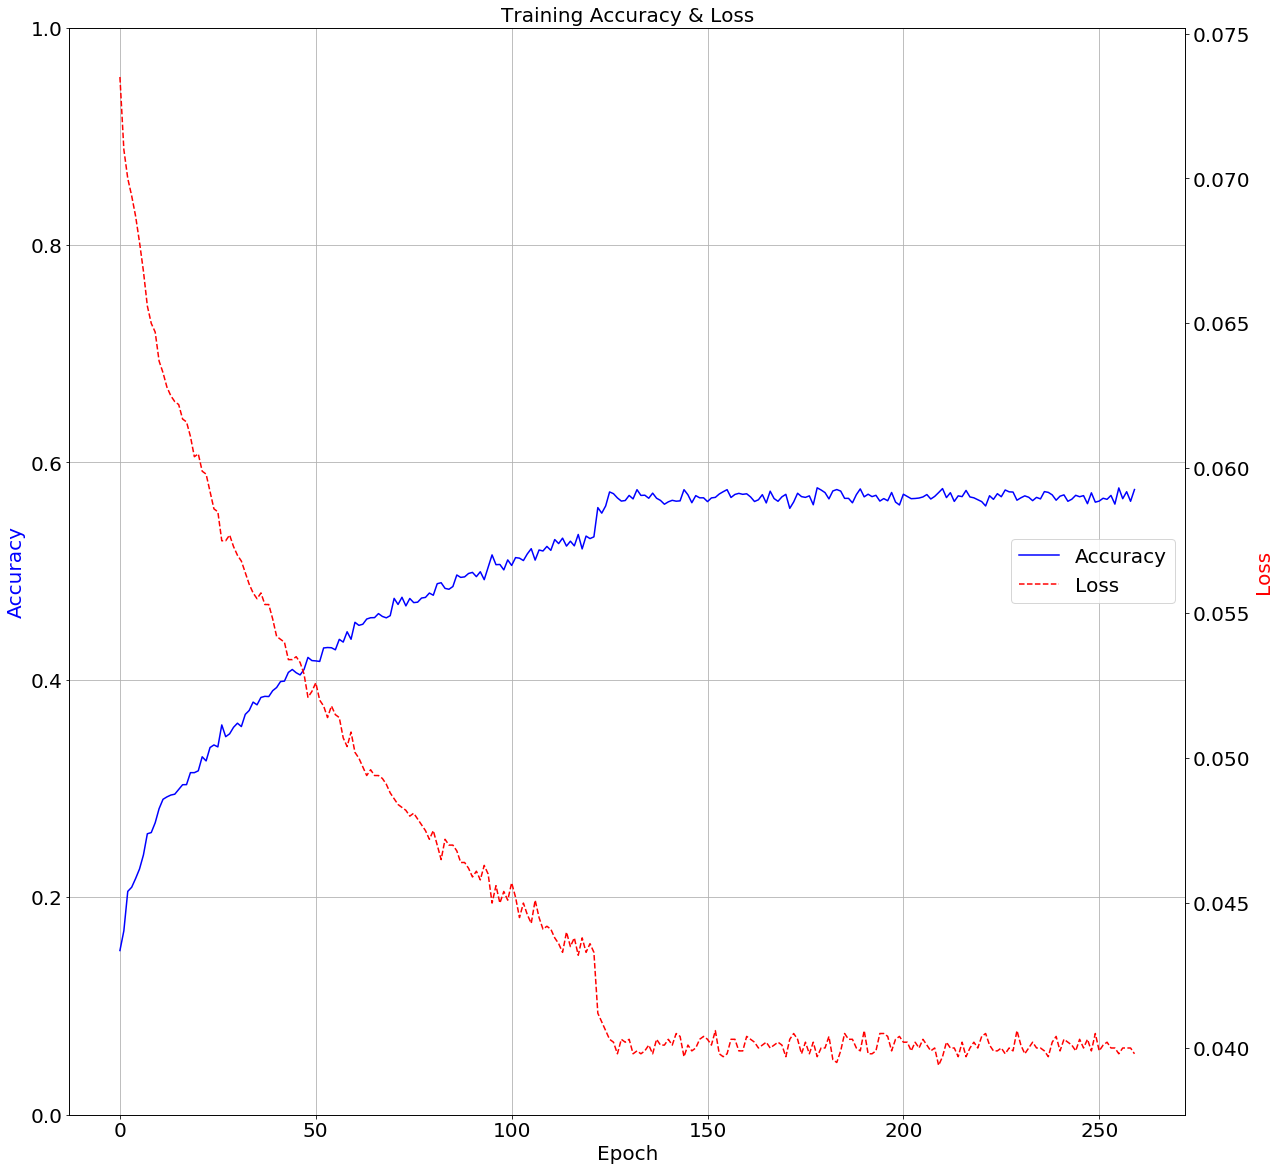

In [75]:
show_train_acc(dictionary_loss, dictionary_acc)